In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Charger le jeu de données
df = pd.read_csv('drug_consumption.data')

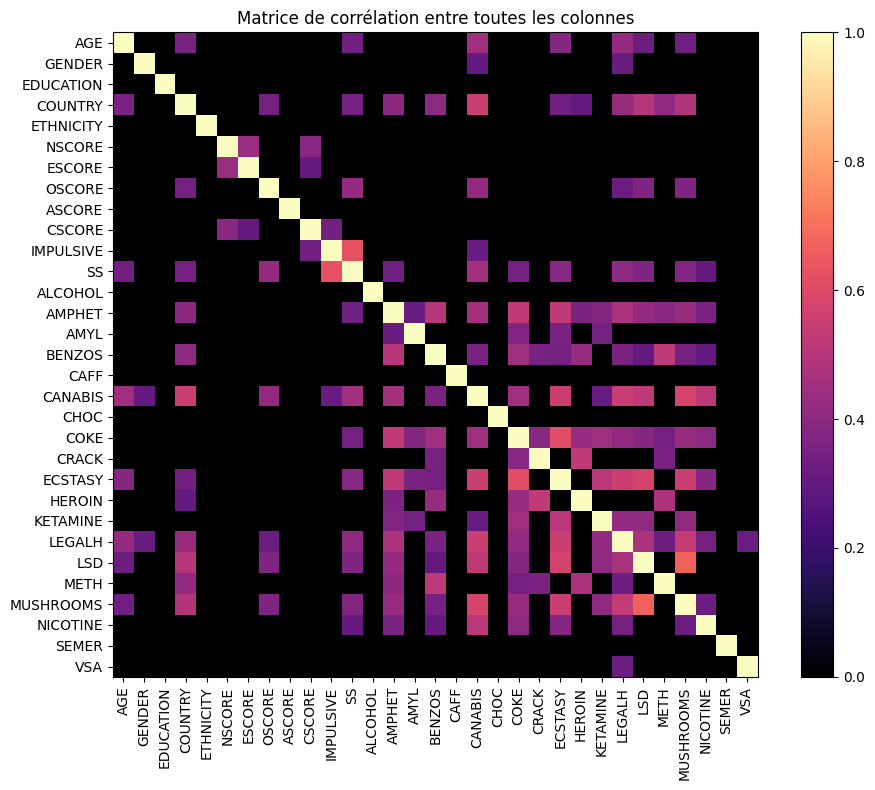

In [19]:
# On compare l'age et la consommation d'alcool

# on fait une matrice de corrélation entre l'age et la consommation d'alcool

# on transforme les données des colonnes en float
# CL0 -> 0
# CL1 -> 1
# CL2 -> 2
# CL3 -> 3
# CL4 -> 4
# CL5 -> 5
# CL6 -> 6

for column in df.columns:
    if column != 'ID':
        df[column] = df[column].replace({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})
        df[column] = df[column] - np.mean(df[column])
        df[column] = df[column] / np.std(df[column])



# On enleve la colonne ID
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])


corr = df.corr()

# on met un seuil pour ne garder que les corrélations significatives
SEUIL = 0.3
corr = corr[(corr >= SEUIL) | (corr <= -SEUIL)]
# On remplace les NaN par 0
corr = corr.fillna(0)
# on fait la valeur absolue de la matrice de corrélation
corr = corr.abs()


# On affiche la matrice de corrélation
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='magma', interpolation='none')

plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Matrice de corrélation entre toutes les colonnes')
plt.tight_layout()

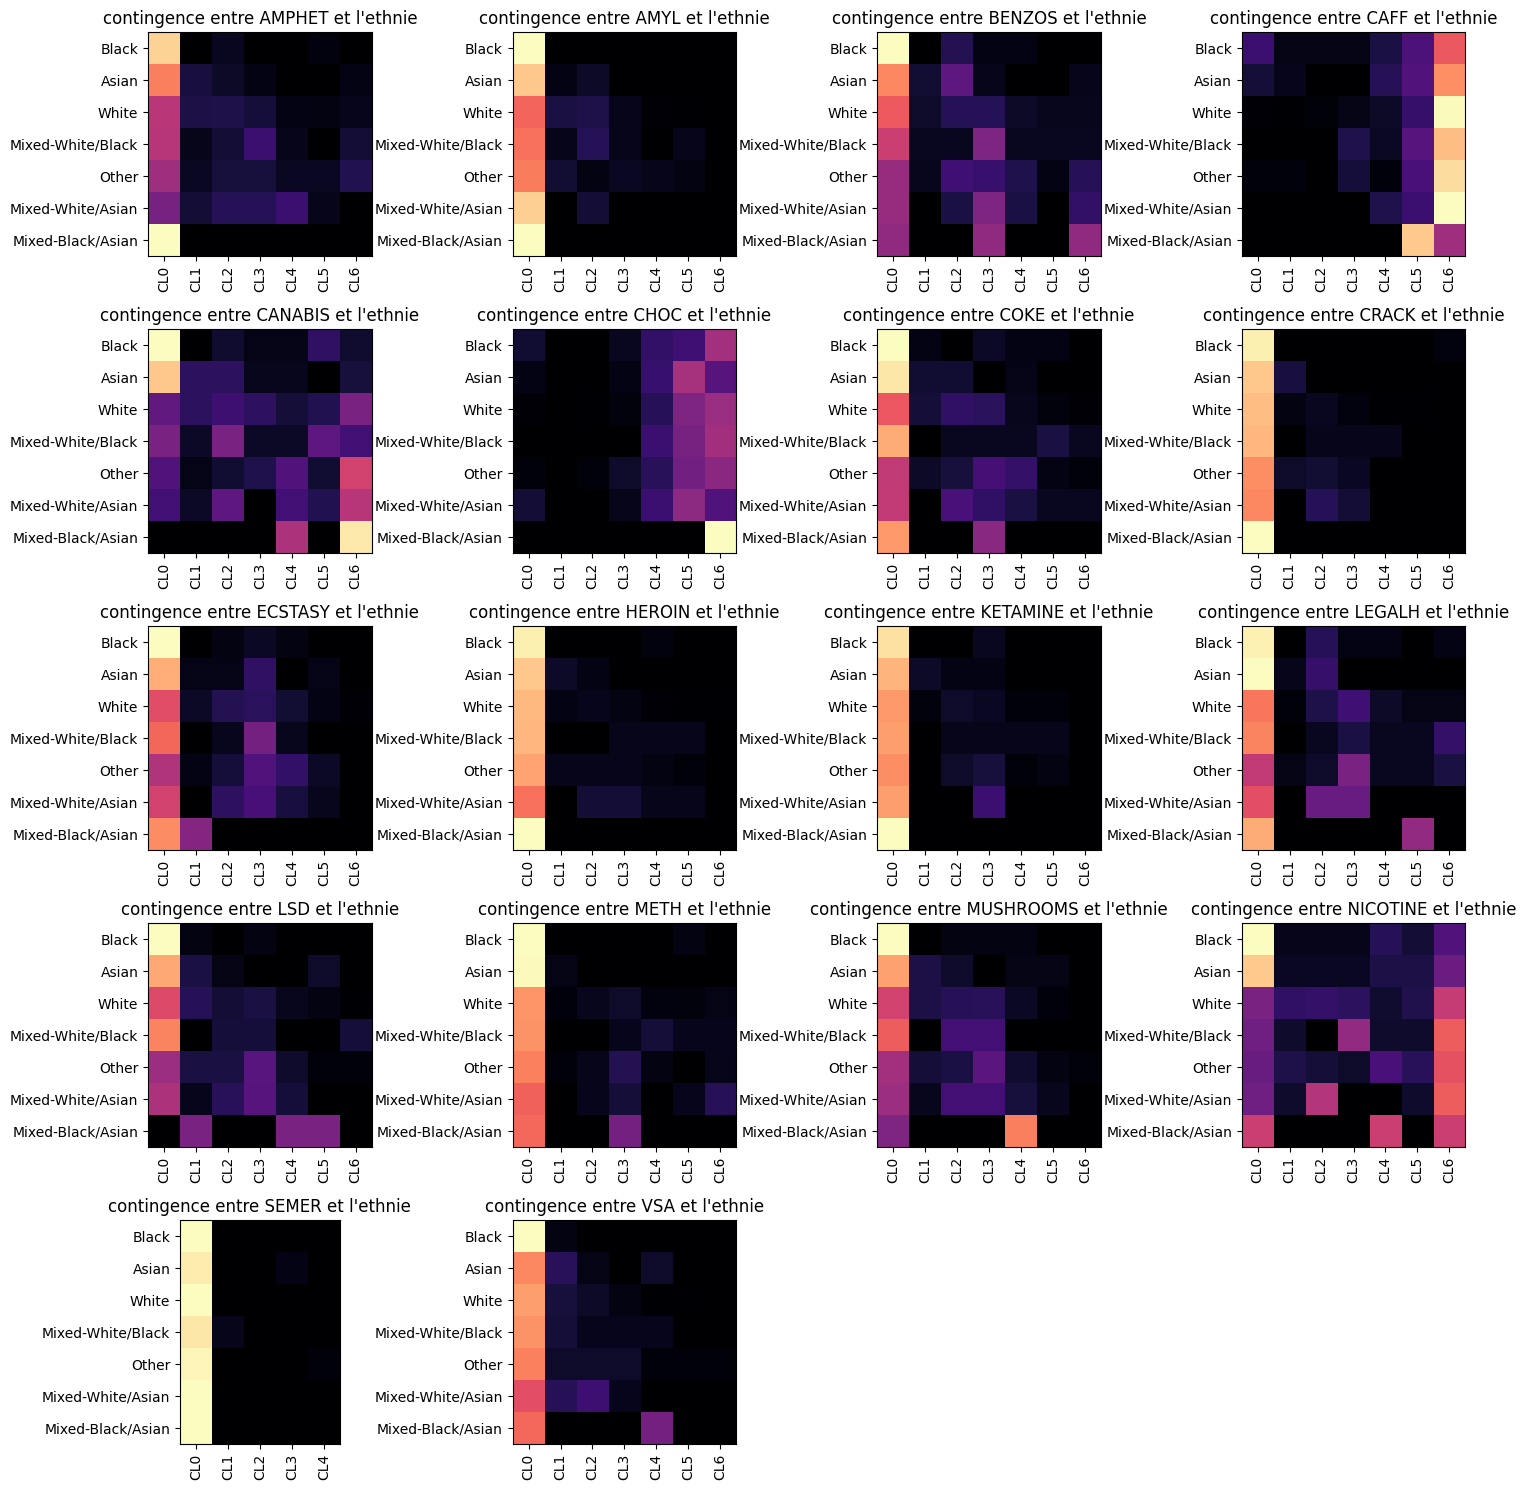

In [62]:

# - CL0 → Never Used
# - CL1 → Used over a Decade 
# - CL2 → Used in Last Decade
# - CL3 → Used in Last Year
# - CL4 → Used in Last Month
# - CL5 → Used in Last Week
# - CL6 → Used in Last Day
QUALITATIVE_LABELS = {
    'AGE':["18-24","25-34","35-44","45-54","55-64","65+"],
    'GENDER':["Homme", "Femme"],
    'EDUCATION':["a quitté l'école avant 16 ans",
                 "a quitté l'école à 16 ans",
                 "a quitté l'école à 17 ans",
                 "a quitté l'école à 18 ans",
                 "a fait un peu d'université mais n'as pas de diplôme ou de certificat",
                 "a un certificat ou diplome professionel",
                 "a un diplome universitaire (Bac+3)",
                 "a un Master (Bac+5)",
                 "a un doctorat (Bac+8+)"],
    'COUNTRY':['USA', 'New Zealand', 'Other', 'Australia', 'Republic of Ireland', 'Canada', 'UK'],
    'ETHNICITY':['Black', 'Asian', 'White', 'Mixed-White/Black', 'Other', 'Mixed-White/Asian', 'Mixed-Black/Asian'],
}
COUNTRY = ['USA', 'New Zealand', 'Other', 'Australia', 'Republic of Ireland', 'Canada', 'UK']
ETHNICITY = ['Black', 'Asian', 'White', 'Mixed-White/Black', 'Other', 'Mixed-White/Asian', 'Mixed-Black/Asian']
CONSOMATION = {"CL0":"Never Used",
                "CL1":"Used over a Decade",
                "CL2":"Used in Last Decade",
                "CL3":"Used in Last Year",
                "CL4":"Used in Last Month",
                "CL5":"Used in Last Week",
                "CL6":"Used in Last Day"}
DRUGS = df.columns[14:]
figure, ax = plt.subplots(5, 4, figsize=(15, 15))
for i,drug in enumerate(DRUGS):
    contingence = pd.crosstab(df['ETHNICITY'], df[drug])
    contingence = contingence.div(contingence.sum(axis=1), axis=0)
    contingence = contingence.fillna(0)
    contingence = contingence.abs()
    ax[i // 4, i%4].imshow(contingence, cmap='magma', interpolation='none')
    ax[i // 4, i%4].set_xticks(range(len(contingence.columns)))
    ax[i // 4, i%4].set_xticklabels(contingence.columns, rotation=90)
    ax[i // 4, i%4].set_yticks(range(len(ETHNICITY)))
    ax[i // 4, i%4].set_yticklabels(ETHNICITY)
    ax[i // 4, i%4].set_title(f"contingence entre {drug} et l'ethnie")
figure.delaxes(ax[4][3])
figure.delaxes(ax[4][2])
plt.tight_layout()
plt.savefig('./image_matplotlib/tableaux_de_contingence_drogues.png')






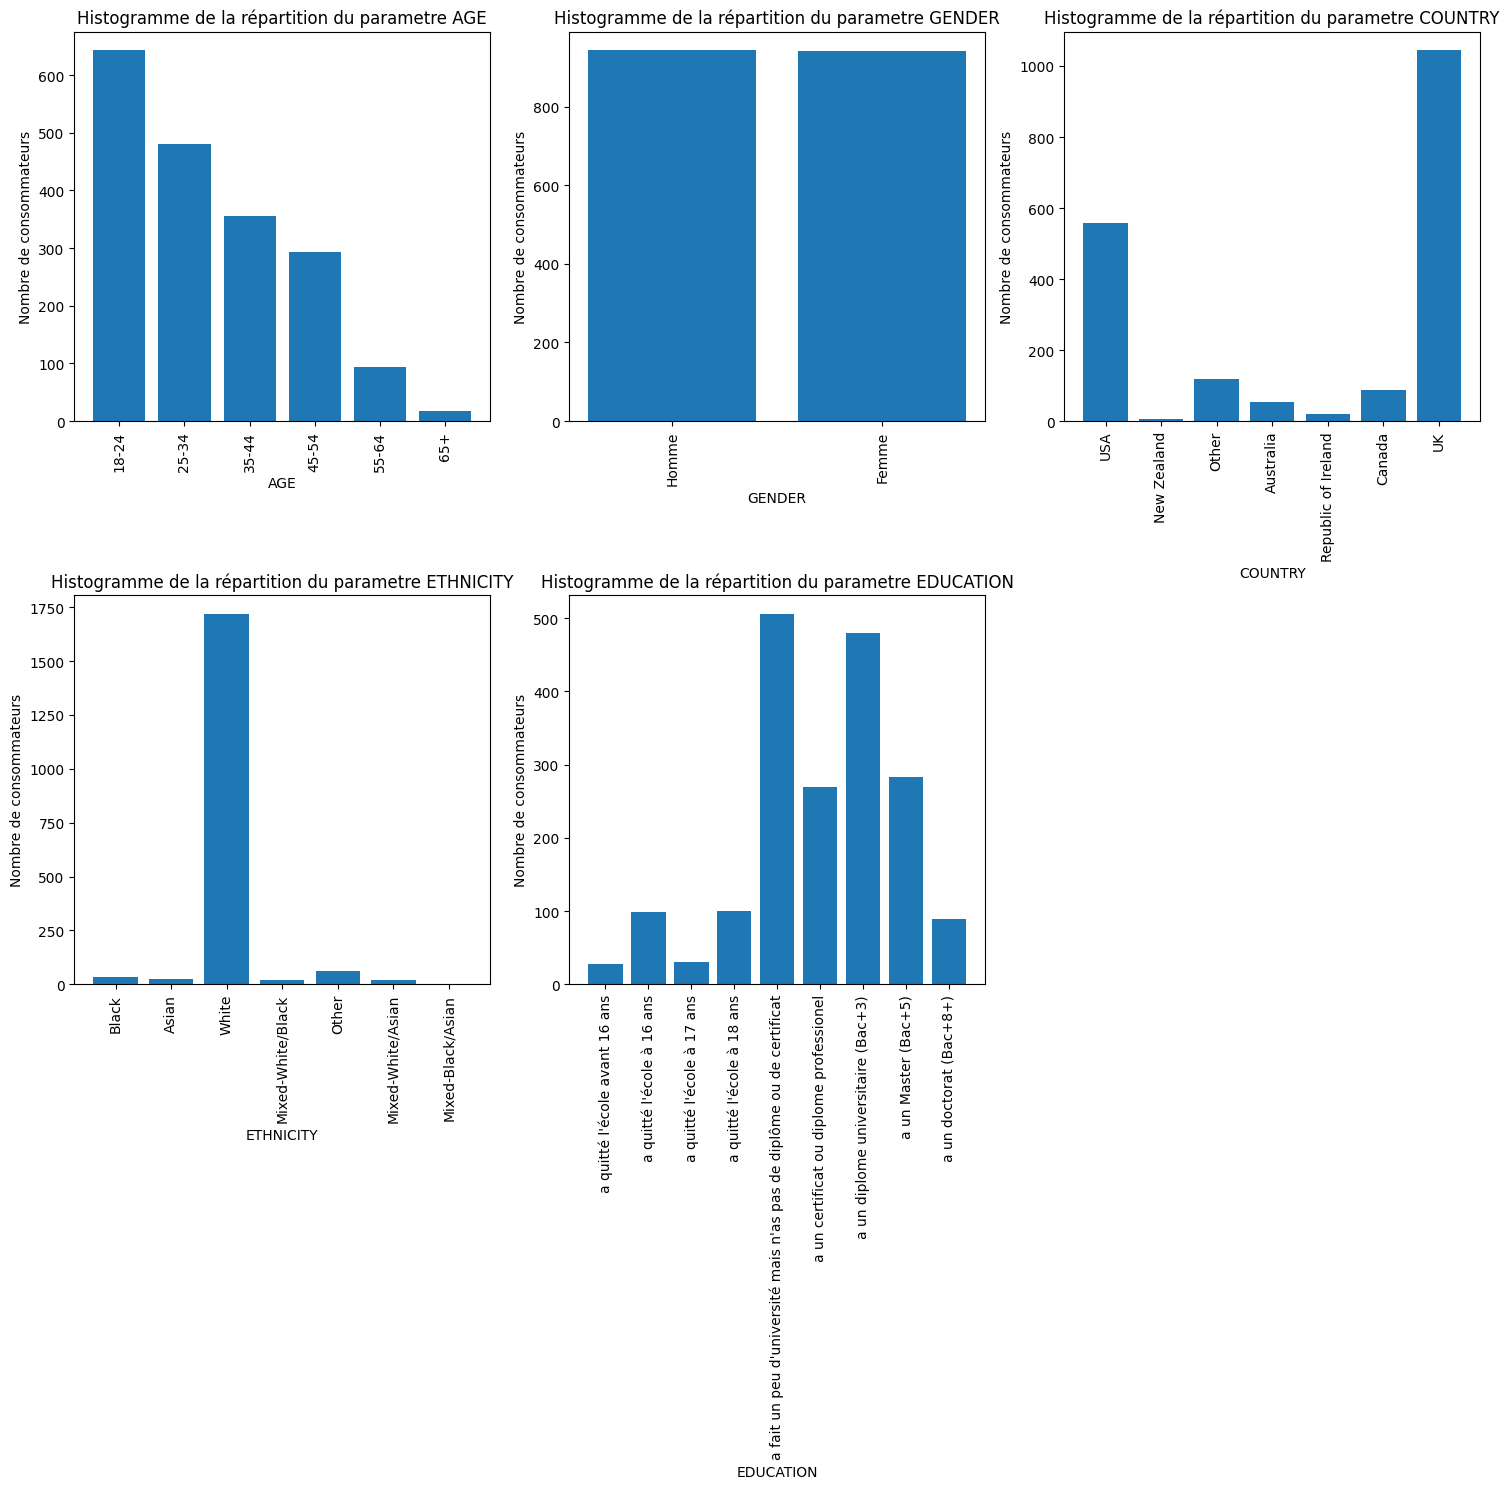

In [59]:
figure, ax = plt.subplots(2, 3, figsize=(15, 15))
parametres_a_afficher = ['AGE','GENDER','COUNTRY','ETHNICITY','EDUCATION']
for i, parametre in enumerate(parametres_a_afficher):
    ax[i//3,i%3].bar(QUALITATIVE_LABELS[parametre],np.unique(df[parametre], return_counts=True)[1])
    ax[i//3,i%3].set_title(f'Histogramme de la répartition du parametre {parametre}')
    ax[i//3,i%3].set_xlabel(parametre)
    ax[i//3,i%3].set_ylabel('Nombre de consommateurs')
    ax[i//3,i%3].set_xticks(QUALITATIVE_LABELS[parametre])
    ax[i//3,i%3].set_xticklabels(QUALITATIVE_LABELS[parametre],rotation=90)
figure.delaxes(ax[1][2])
plt.tight_layout()
plt.savefig('./image_matplotlib/histogrammes_qualitatifs.png')
